Here is just a way to query some data from OpenEO

In [1]:
# Import required packages
import openeo
from openeo.processes import process

# Connect to the back-end
connection = openeo.connect("https://openeo.cloud").authenticate_oidc()
#https://openeo.cloud
# ToDo: Here you need to authenticate with authenticate_basic() or authenticate_oidc()


Authenticated using refresh token.


In [2]:
load1 = connection.load_collection(collection_id = "SENTINEL2_L2A_SENTINELHUB", bands = ["B04", "B03", "B02","B08"], spatial_extent = {"east": 8.961145817369813,
          "north": 44.4366991352135,
          "south": 44.373626699814,
          "west": 8.837940236377976}, 
                                   temporal_extent = ["2022-11-01T00:00:00Z", "2022-11-10T00:00:00Z"] )

In [3]:
%time job = load1.execute_batch(title="S2 bands of Genoa", description="Required bands for ship detection", out_format="NETCDF")

0:00:00 Job 'vito-j-3ceb0ce2946a4d578c8309aec0d8d56b': send 'start'
0:00:17 Job 'vito-j-3ceb0ce2946a4d578c8309aec0d8d56b': queued (progress N/A)
0:00:23 Job 'vito-j-3ceb0ce2946a4d578c8309aec0d8d56b': queued (progress N/A)
0:00:29 Job 'vito-j-3ceb0ce2946a4d578c8309aec0d8d56b': queued (progress N/A)
0:00:37 Job 'vito-j-3ceb0ce2946a4d578c8309aec0d8d56b': queued (progress N/A)
0:00:47 Job 'vito-j-3ceb0ce2946a4d578c8309aec0d8d56b': queued (progress N/A)
0:01:00 Job 'vito-j-3ceb0ce2946a4d578c8309aec0d8d56b': queued (progress N/A)
0:01:15 Job 'vito-j-3ceb0ce2946a4d578c8309aec0d8d56b': running (progress N/A)
0:01:35 Job 'vito-j-3ceb0ce2946a4d578c8309aec0d8d56b': running (progress N/A)
0:01:59 Job 'vito-j-3ceb0ce2946a4d578c8309aec0d8d56b': running (progress N/A)
0:02:30 Job 'vito-j-3ceb0ce2946a4d578c8309aec0d8d56b': running (progress N/A)
0:03:07 Job 'vito-j-3ceb0ce2946a4d578c8309aec0d8d56b': finished (progress N/A)
CPU times: user 54.1 ms, sys: 10.6 ms, total: 64.7 ms
Wall time: 3min 9s


In [4]:
results = job.get_results()
results.download_files("./validation_data")

[PosixPath('validation_data/openEO.nc'),
 PosixPath('validation_data/job-results.json')]

The only requirement is to feed the model  with a path to : 
    - A netCDF file that contains the necessary bands (B02, B03, B04 and B08)
    OR
    - A folder that contains the bands as single TIFFs 

Example for TIFFs format : 

All bands loaded successfully.
Raw shape of the dataset was (1126, 1351, 6)
New shape of each individual tile is (1088, 1344)
357/357 [===========================]


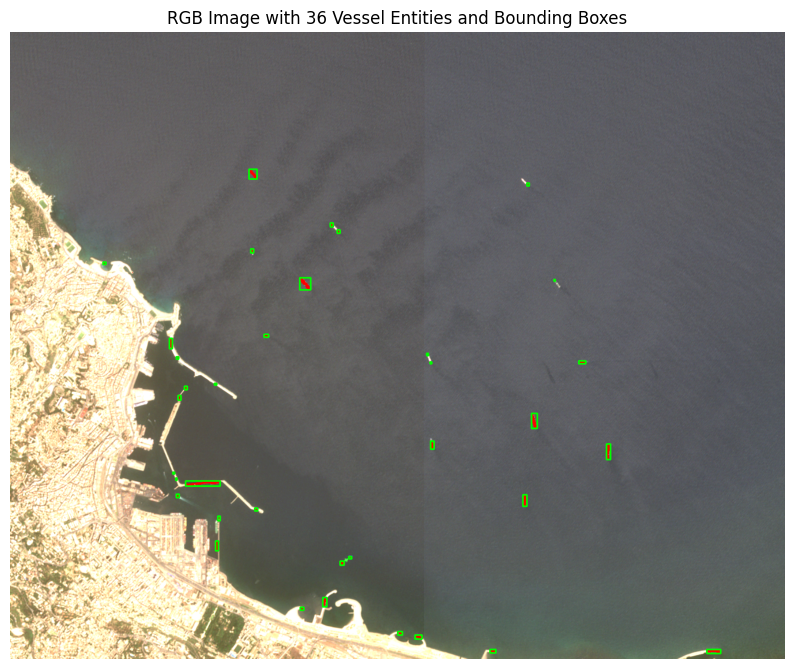

Number of Vessel Entities: 36


In [9]:
from inference_notebook_support import *
from models import *

dataset_folder = 'validation_data/'

threshold = 0.4
ship_detector(dataset_folder,threshold, min_size_threshold = 2, file_format="gtiff")


Example for netCDF format : 

Raw shape of the dataset was (703, 983, 6)
New shape of each individual tile is (640, 960)
150/150 [===========================]


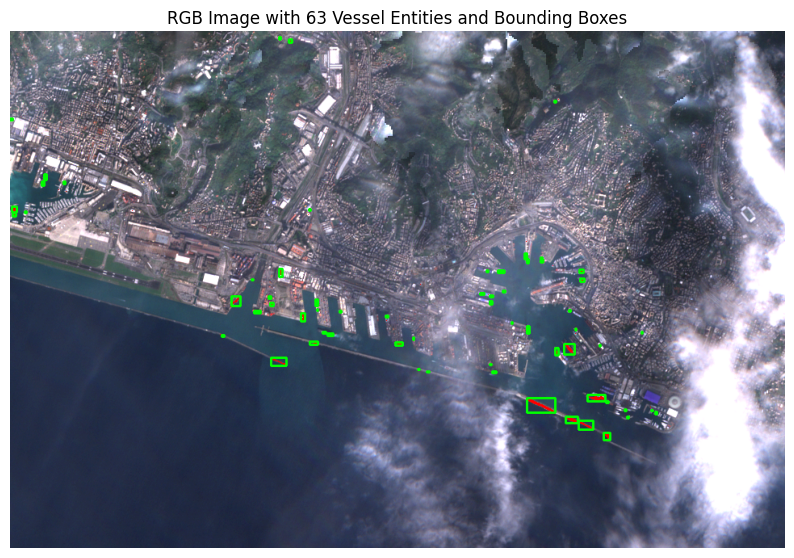

Number of Vessel Entities: 63


In [7]:
from inference_notebook_support import *
from models import *

dataset_folder = 'validation_data/openEO.nc'

threshold = 0.75
ship_detector(dataset_folder,threshold, min_size_threshold = 2, file_format="netcdf")